In [1]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
import skimage.io as io
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import os
import glob

In [3]:
#dir = r'/content/DATA'
#for count, filename in enumerate(os.listdir(dir)):
 #   dst = os.path.join(dir, f"BEAR_{count}.jpg")
  #  src = os.path.join(dir, filename)
 
   # os.rename(src, dst)

In [4]:
path = '/content/NEW_DATA'

In [5]:
#providing the path of the folder
if not os.path.exists(path):
    os.makedirs(path)
#r = raw string literal


In [6]:
folder_path = (r'/content/NEW_DATA')

#using listdir() method to list the files of the folder
test = os.listdir(folder_path)

#taking a loop to remove all the images
#using ".png" extension to remove only png images
#using os.remove() method to remove the files

for images in test:
    if images.endswith(".jpg"):
        os.remove(os.path.join(folder_path, images))

In [7]:
images = []
labels = []


In [8]:
from PIL import Image
import glob
import os

# new folder path (may need to alter for Windows OS)
# change path to your path
path = '/content/NEW_DATA'
# create new folder


# loop over existing images and resize
# change path to your path
for filename in glob.glob('/content/DATA/*.jpg'):
    img = Image.open(filename).resize((128,128))
    # save resized images to new folder with existing filename
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))
for filename in glob.glob('/content/DATA/*.jpeg'):
    img = Image.open(filename).resize((128,128))
    # save resized images to new folder with existing filename
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))

In [9]:
for file in os.listdir(path):
    tep = io.imread(os.path.join(path, file), as_gray=True).reshape(1,-1)
    images.append(tep)
    if ((file.split("_")[0]) == 'BEAR'):
        labels.append(1)
    else:
        labels.append(0)

In [10]:
x = np.concatenate(images, axis=0)

1


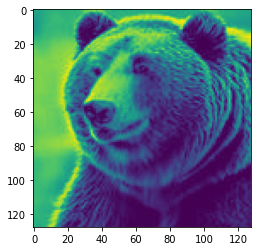

In [11]:
       
print(labels[50])
plt.imshow(x[50].reshape(128,128))

In [12]:


x, y = shuffle(x,labels, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,random_state=21, stratify=y)

model = make_pipeline(StandardScaler(),
                   linear_model.Perceptron(tol = 1e-3, random_state=12))
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron', Perceptron(random_state=12))])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


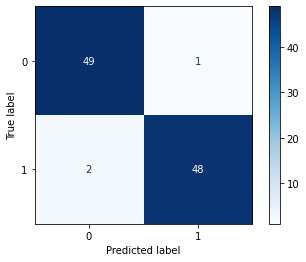

In [13]:


y_pred = model.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
acu

metrics.plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)

In [14]:
acu

0.97

In [15]:
#!zip -r /content/DATA.zip /content/DATA

In [16]:
#from google.colab import files
#files.download('/content/DATA.zip')